In [1]:
from MultiLayerFinal import NN
import numpy as np
import random
from scipy.special import expit
from perceptron_object import Perceptron
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = np.loadtxt('sin.csv', delimiter = ',')

In [3]:
Per = Perceptron(data[:,0:2], data[:,2:3], alpha = .001, iteration = 200, test_percentage = .1, binary = True)

192.0


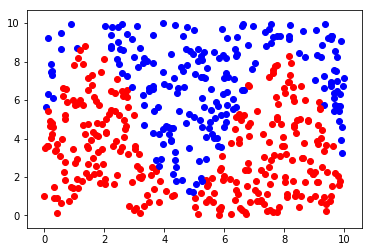

In [4]:
for i in range(0,500):
    if data[i,2] == 1:
        plt.scatter(data[i,0], data[i,1], color = 'blue')
    else:
        plt.scatter(data[i,0], data[i,1], color = 'red')
plt.show()
    

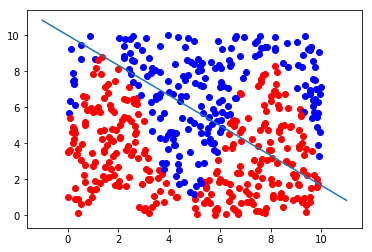

In [5]:
def plot_weights(w):
    x = np.arange(-1,11,.01)
    y = (-w[0]-w[1]*x)/w[2]
    plt.plot(x,y)
plot_weights(Per.weights[1,:])
    
for i in range(0,500):
    if data[i,2] == 1:
        plt.scatter(data[i,0], data[i,1], color = 'blue')
    else:
        plt.scatter(data[i,0], data[i,1], color = 'red')
plt.show()
    

In [6]:
def quadratic(data):
    return np.transpose(np.vstack((data[:,0], data[:, 1], data[:,0]*data[:,1], data[:,0]**2, data[:,1]**2)))

In [7]:
new_data = quadratic(data[:, 0:2])

In [8]:
Per_q = Perceptron(new_data, data[:,2:3], alpha = 1.05, iteration = 3000, test_percentage = .2, binary = True)

170.0


In [9]:
def quad(a,b,c):
    dis = ((abs(b**2-4*a*c))**.5)
    return (-b+dis)/float(2*a)
    

In [10]:
def y(x, w):
    a = w[5]
    b = x*w[3]+w[2]
    c = w[0]+w[1]*x+w[4]*x*x
    return quad(a,b,c)

In [11]:
xs = np.arange(1,10,.1)
ys = y(xs, Per_q.binary_weigths)

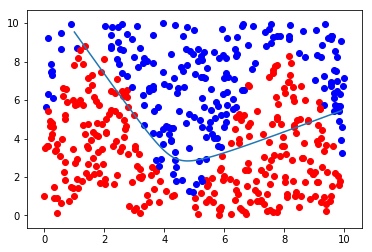

In [12]:
for i in range(0,500):
	if data[i,2] == 1:
		plt.scatter(data[i,0], data[i,1], color = 'blue')
	else:
		plt.scatter(data[i,0], data[i,1], color = 'red')

plt.plot(xs, ys)
plt.show()
    

In [13]:
Per_q.accuracy


0.76000000000000001

In [23]:
x = data[:, 0:2]
y = data[:, 2:3]
a = NN(x, y, hidden_layer_size = 2)
c,d = a.feed_foward(x)


In [24]:
errors = a.train(alpha = .05, iterations = 30000)


125.005753488 1 Thousand Iterations
120.88726583 2 Thousand Iterations
128.071961541 3 Thousand Iterations
118.398988797 4 Thousand Iterations
119.068817344 5 Thousand Iterations
116.898440832 6 Thousand Iterations
118.905118809 7 Thousand Iterations
115.476118749 8 Thousand Iterations
115.059242926 9 Thousand Iterations
113.71477157 11 Thousand Iterations
118.794007071 12 Thousand Iterations
115.154809159 13 Thousand Iterations
114.966567356 14 Thousand Iterations
113.432684306 15 Thousand Iterations
115.866636704 16 Thousand Iterations
111.294979952 17 Thousand Iterations
111.014113525 18 Thousand Iterations
128.21460497 19 Thousand Iterations
110.048275779 21 Thousand Iterations
114.451131446 22 Thousand Iterations
115.819653478 23 Thousand Iterations
104.782395562 24 Thousand Iterations
104.699403112 25 Thousand Iterations
105.48269262 26 Thousand Iterations
99.8983493171 27 Thousand Iterations
99.4837537937 28 Thousand Iterations
99.2358807523 29 Thousand Iterations


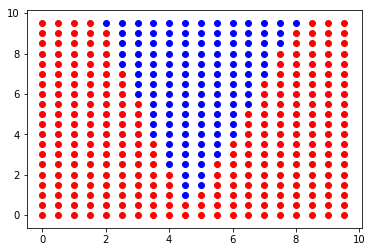

In [25]:
for i in range(0,20):
    it = i/2.0
    for j in range(0,20):
        jt = j/2.0
        b = a.predict([it,jt])
        if b[0]>=.5:
            plt.scatter(it, jt, color = 'blue')
        else: plt.scatter(it, jt, color = 'red')
plt.show()

In [26]:
c,r = a.test(x, y)
np.sum(c),

(438,)

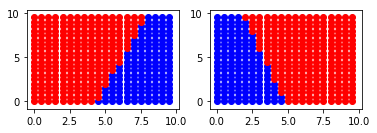

In [27]:
for i in range(1,3):
    plt.subplot(2,2,i)
    for k in range(0,20):
        it = k/2.0
        for j in range(0,20):
            jt = j/2.0
            r = a.feed_foward([it, jt])
            if r[0][0][i-1]>=.5:
                plt.scatter(it, jt, color = 'blue')
            else: plt.scatter(it, jt, color = 'red')
plt.show()

In [52]:
new = NN(x, y, hidden_layer_size = 6)

In [53]:
errors = new.train(x, alpha = .001, iterations = 30000)

152.516578623 1 Thousand Iterations
142.271504224 2 Thousand Iterations
137.619939822 3 Thousand Iterations
133.123886162 4 Thousand Iterations
129.670291376 5 Thousand Iterations
126.748189838 6 Thousand Iterations
124.073996836 7 Thousand Iterations
121.561270301 8 Thousand Iterations
119.214001125 9 Thousand Iterations
115.111309985 11 Thousand Iterations
113.377299927 12 Thousand Iterations
111.848350434 13 Thousand Iterations
110.50823442 14 Thousand Iterations
109.336171677 15 Thousand Iterations
108.310265654 16 Thousand Iterations
107.409824866 17 Thousand Iterations
106.616553413 18 Thousand Iterations
105.914932263 19 Thousand Iterations
104.737728521 21 Thousand Iterations
104.243274507 22 Thousand Iterations
103.801925514 23 Thousand Iterations
103.407999412 24 Thousand Iterations
103.056555559 25 Thousand Iterations
102.742978004 26 Thousand Iterations
102.462607294 27 Thousand Iterations
102.210499792 28 Thousand Iterations
101.981421693 29 Thousand Iterations


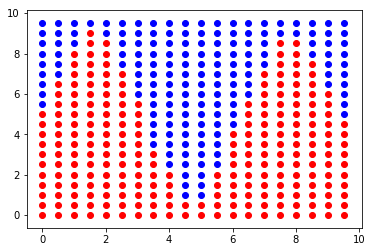

In [49]:
for i in range(0,20):
    it = i/2.0
    for j in range(0,20):
        jt = j/2.0
        b = new.predict([it,jt])
        if b[0]>=.5:
            plt.scatter(it, jt, color = 'blue')
        else: plt.scatter(it, jt, color = 'red')
plt.show()

In [50]:
c,r = new.test(x, y)
np.sum(c)

496

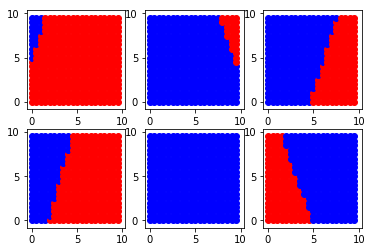

In [51]:
for i in range(1,7):
    plt.subplot(2,3,i)
    for k in range(0,20):
        it = k/2.0
        for j in range(0,20):
            jt = j/2.0
            r = new.feed_foward([it, jt])
            if r[0][0][i-1]>=.5:
                plt.scatter(it, jt, color = 'blue')
            else: plt.scatter(it, jt, color = 'red')
plt.show()